In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set()

In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader , Dataset , random_split
import torchvision.datasets as datasets 
import torchvision.transforms as transforms

In [3]:
from pathlib import Path
import os
import random
from PIL import Image
data_path = Path(r'C:\Users\besho\Downloads\eye-disease')
images_path = data_path / "dataset" 

In [4]:
def walk_through_dir(dir_path):
    classes = []
    for dirpath , dirnames , filenames in os.walk(dir_path):
#         print(f'there is {len(dirnames)} directories and {len(filenames)} images in {dirpath}')
        classes.append(dirpath.split('\\')[-1])
    return classes[1:]
classes = walk_through_dir(images_path)

there is 4 directories and 0 images in C:\Users\besho\Downloads\eye-disease\dataset
there is 0 directories and 1038 images in C:\Users\besho\Downloads\eye-disease\dataset\cataract
there is 0 directories and 1098 images in C:\Users\besho\Downloads\eye-disease\dataset\diabetic_retinopathy
there is 0 directories and 1007 images in C:\Users\besho\Downloads\eye-disease\dataset\glaucoma
there is 0 directories and 1074 images in C:\Users\besho\Downloads\eye-disease\dataset\normal


In [5]:
# classes

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

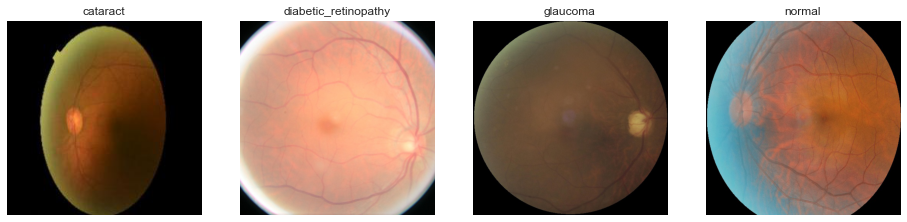

In [6]:
# fig ,ax = plt.subplots(nrows =1 , ncols= 4)
# ind = 0
# for i in classes:
    
#     temp = images_path / i
#     list_of_images = list(temp.glob('*'))
#     random_image = random.choice(list_of_images)
#     img = Image.open(random_image)
#     ax[ind].imshow(img)
#     ax[ind].set_title(f'{i}')
#     ax[ind].axis(False)
#     ind += 1

In [7]:
transform = transforms.Compose([
    transforms.Resize(size = (256,256)), 
    transforms.ToTensor()
])


In [8]:
data = datasets.ImageFolder(root = images_path , transform = transform )
loader = DataLoader(dataset = data , batch_size = 16 , shuffle = True)

In [9]:
def get_mean_std(loader):
    #std = square_Root(  E[X**2] - E[X]**2        )
    n_batches , channels_sum , channels_squared_sum = 0 ,0 ,0
    for x , _ in loader:
        channels_sum += torch.mean(x , dim = [0,2,3])
        channels_squared_sum += torch.mean(x**2 , dim = [0 , 2, 3])
        n_batches += 1
        
    mean = channels_sum / n_batches 
    std = (channels_squared_sum / n_batches - mean**2)**0.5
    
    return mean , std
mean , std = get_mean_std(loader)

In [10]:
def getData(h , w):
    origTransformation = transforms.Compose([
    transforms.Resize(size = (h,w)), 
    transforms.ToTensor() , 
    transforms.Normalize(mean=mean , std = std)
        ])
    
    data = datasets.ImageFolder(root = images_path , transform = origTransformation )
    train , val , test = random_split(data , [3817 , 200 ,200])

    train_loader = DataLoader(dataset = train , batch_size = 8 , shuffle = True)
    val_loader = DataLoader(dataset = val , batch_size = 8 , shuffle = True)
    test_loader = DataLoader(dataset = test , batch_size = 8 , shuffle = True)
    
    return train_loader , val_loader , test_loader